<a href="https://colab.research.google.com/github/shameeralimt/POWERBI-PROJECT-2/blob/main/Welcome_To_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [38]:
import numpy as np
import matplotlib.pyplot as  plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [32]:
import pandas as pd

In [5]:
dataset = pd.read_csv('/content/gender_classification_v7.csv')

In [9]:
dataset

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,Male
1,0,14.0,5.4,0,0,1,0,Female
2,0,11.8,6.3,1,1,1,1,Male
3,0,14.4,6.1,0,1,1,1,Male
4,1,13.5,5.9,0,0,0,0,Female
...,...,...,...,...,...,...,...,...
4996,1,13.6,5.1,0,0,0,0,Female
4997,1,11.9,5.4,0,0,0,0,Female
4998,1,12.9,5.7,0,0,0,0,Female
4999,1,13.2,6.2,0,0,0,0,Female


In [25]:
dataset.isnull().sum()

,0
long_hair,0
forehead_width_cm,0
forehead_height_cm,0
nose_wide,0
nose_long,0
lips_thin,0
distance_nose_to_lip_long,0
gender,0


In [26]:
dataset.describe()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
count,5001.000000,5001.000000,5001.000000,5001.000000,5001.000000,5001.000000,5001.000000,5001.00000
mean,0.869626,13.181484,5.946311,0.493901,0.507898,0.493101,0.498900,0.49990
std,0.336748,1.107128,0.541268,0.500013,0.499988,0.500002,0.500049,0.50005
min,0.000000,11.400000,5.100000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,1.000000,12.200000,5.500000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,1.000000,13.100000,5.900000,0.000000,1.000000,0.000000,0.000000,0.00000
75%,1.000000,14.000000,6.400000,1.000000,1.000000,1.000000,1.000000,1.00000
max,1.000000,15.500000,7.100000,1.000000,1.000000,1.000000,1.000000,1.00000


In [27]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
dataset['gender'] = le.fit_transform(dataset['gender'])
dataset


,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,1
1,0,14.0,5.4,0,0,1,0,0
2,0,11.8,6.3,1,1,1,1,1
3,0,14.4,6.1,0,1,1,1,1
4,1,13.5,5.9,0,0,0,0,0
...,...,...,...,...,...,...,...,...
4996,1,13.6,5.1,0,0,0,0,0
4997,1,11.9,5.4,0,0,0,0,0
4998,1,12.9,5.7,0,0,0,0,0
4999,1,13.2,6.2,0,0,0,0,0


checking correlation

In [28]:
corr_r = dataset.corr()

CREATING HEATMAP

<Axes: >

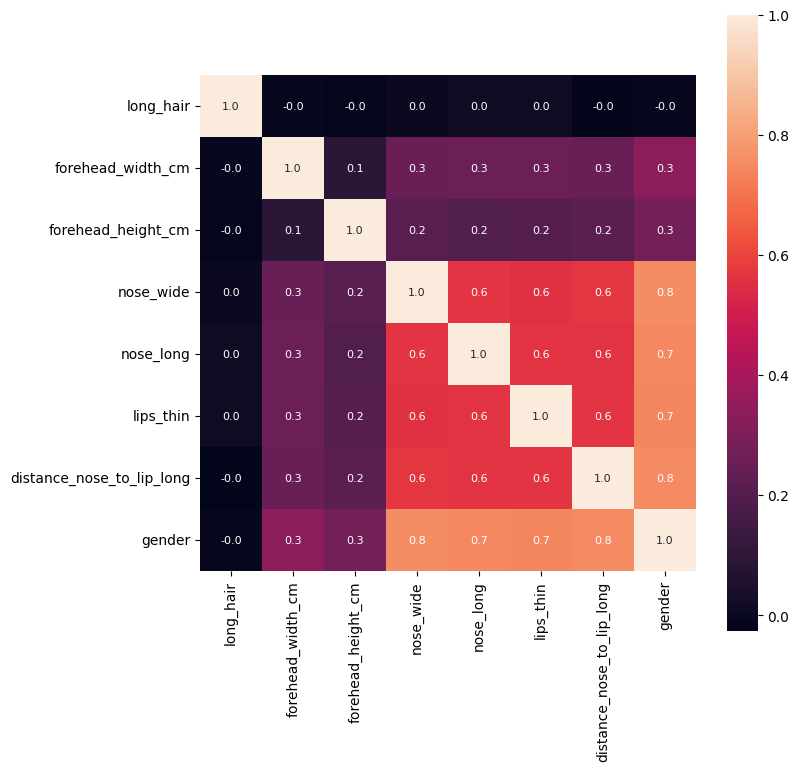

In [42]:
plt.figure(figsize=(8,8))
sns.heatmap(corr_r, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8})


In [43]:
print(corr_r['gender'])


long_hair                   -0.010767
forehead_width_cm            0.334125
forehead_height_cm           0.277190
nose_wide                    0.758502
nose_long                    0.744147
lips_thin                    0.743319
distance_nose_to_lip_long    0.754850
gender                       1.000000
Name: gender, dtype: float64


SPLITTING

In [44]:
x= dataset.drop(['gender'], axis=1)
y= dataset['gender']

In [46]:
print(x)

      long_hair  forehead_width_cm  forehead_height_cm  nose_wide  nose_long  \
0             1               11.8                 6.1          1          0   
1             0               14.0                 5.4          0          0   
2             0               11.8                 6.3          1          1   
3             0               14.4                 6.1          0          1   
4             1               13.5                 5.9          0          0   
...         ...                ...                 ...        ...        ...   
4996          1               13.6                 5.1          0          0   
4997          1               11.9                 5.4          0          0   
4998          1               12.9                 5.7          0          0   
4999          1               13.2                 6.2          0          0   
5000          1               15.4                 5.4          1          1   

      lips_thin  distance_nose_to_lip_l

In [47]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state=2)

MODEL TRAINING

In [50]:

regressor = RandomForestRegressor(n_estimators=100)

In [51]:
regressor.fit(x_train, y_train)

RandomForestRegressor()

In [52]:
test_data_prediction = regressor.predict(x_test)

In [53]:
print(test_data_prediction)

[1.   1.   1.   ... 1.   0.   0.98]


EVALUATING

In [55]:
error_score = metrics.r2_score(y_test, test_data_prediction)
print("R squared error :", error_score)

R squared error : 0.9026790402925761


In [56]:
y_test = list(y_test)

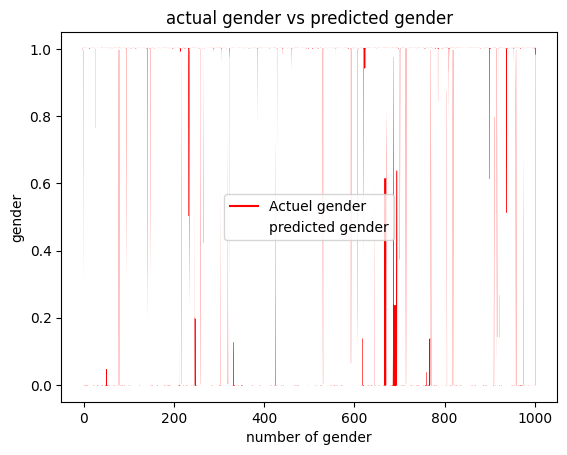

In [62]:
plt.plot(y_test, color='red', label = 'Actuel gender')
plt.plot(test_data_prediction, color='white', label= 'predicted gender')
plt.title('actual gender vs predicted gender')
plt.xlabel('number of gender')
plt.ylabel('gender')
plt.legend()
plt.show()